<a href="https://colab.research.google.com/github/ailafelixa/modelo-cancer-de-mama/blob/main/breast_cancer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de machine learning para predição de malignidade do câncer de mama com base em características do núcleo das células tumorais

O modelo foi construído com base em um [dataset público](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)) contendo informações das características morfológicas de tumores de mama obtidas a partir de imagens do núcleo das células desses tumores. O objetivo é conseguir predizer se o tumor é benigno ou maligno com base nas características nucleares disponíveis. 

## Background 
O termo "câncer de mama" engloba um grupo diverso de tumores que afetam o tecido mamário. Esses tipos tumorais podem ser diferenciados molecularmente e histologicamente, apresentando grande heterogeneidade(1). Em 2018 quase 8 milhões de mulheres viviam com câncer de mama e apenas em 2020 foram diagnosticados mais de 2 milhões de novos casos de câncer de mama, fazendo com que esse seja o tipo de câncer mais diagnosticado no mundo todo(2). A mortalidade devido a esse grupo de doenças também é alto (1 a cada 8 mulheres) e deve aumentar de forma significativa nos próximos 20 anos. Diagnosticar corretamente o tipo e a gravidade do tumor permite que a equipe médica tome decisões mais acertivas que aumentem a sobrevida da(o) paciente.  

## Dataset
O dataset possui dados de 569 tumores diferentes, contendo ao todo 32 variáveis como área, perímetro e textura do núcleo das células da massa tumoral mamária, entre outras. Os dados foram coletados e doados pela Universidade de Wisconsin em 1995. 

#### Referências
1. Kashyap, D., Pal, D., Sharma, R., Garg, V. K., Goel, N., Koundal, D., Zaguia, A., Koundal, S., & Belay, A. (2022). Global Increase in Breast Cancer Incidence: Risk Factors and Preventive Measures. BioMed research international, 2022, 9605439. https://doi.org/10.1155/2022/9605439
2. Sung H., Ferlay J., Siegel R. L., et al. Global cancer statistics 2020: GLOBOCAN estimates of incidence and mortality worldwide for 36 cancers in 185 countries. CA: a cancer journal for clinicians . 2021;71(3):209–249

## Importando pacotes necessários

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(42)

## Carregando o dataset

In [3]:
data = load_breast_cancer(as_frame = True)

In [8]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data_df = data.frame

## Análise descritiva

Em primeiro lugar vamos realizar uma análise descritiva que permitirá entender melhor o dataset, seu formato, o tipo de dados que ele contém, entre outras coisas.

In [ ]:
#Verificando o tamanho do dataset
data_df.shape

(569, 31)

In [ ]:
#Verificando se existem valores nulos e se as colunas estão com os tipos corretos de dados
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#Verificando os valores das variáveis
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#Descrevendo os principais aspectos de cada coluna
data_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Podemos ver que todas as variáveis tem valores contínuos e as escalas diferem bastante entre diferentes colunas, tendo valores menores do que um e valores mais altos, na casa dos milhares. Além disso, algumas colunas possuem zeros.

In [ ]:
#Vamos verificar a distribuição da variável alvo no dataset
data_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
#Transformando em porcentagem
data_df.target.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

As amostras do tipo 1 indicam que o câncer é benigno. 0 indica que o câncer é maligno. Podemos verificar que 62% dos nossos dados correspondem a casos benignos de câncer e 37% correspondem a casos malígnos de câncer. Portanto, esse é um dataset desbalanceado.

## Análise exploratória

A análise exploratória permite uma melhor compreensão das relações entre diferentes variáveis dentro do dataset

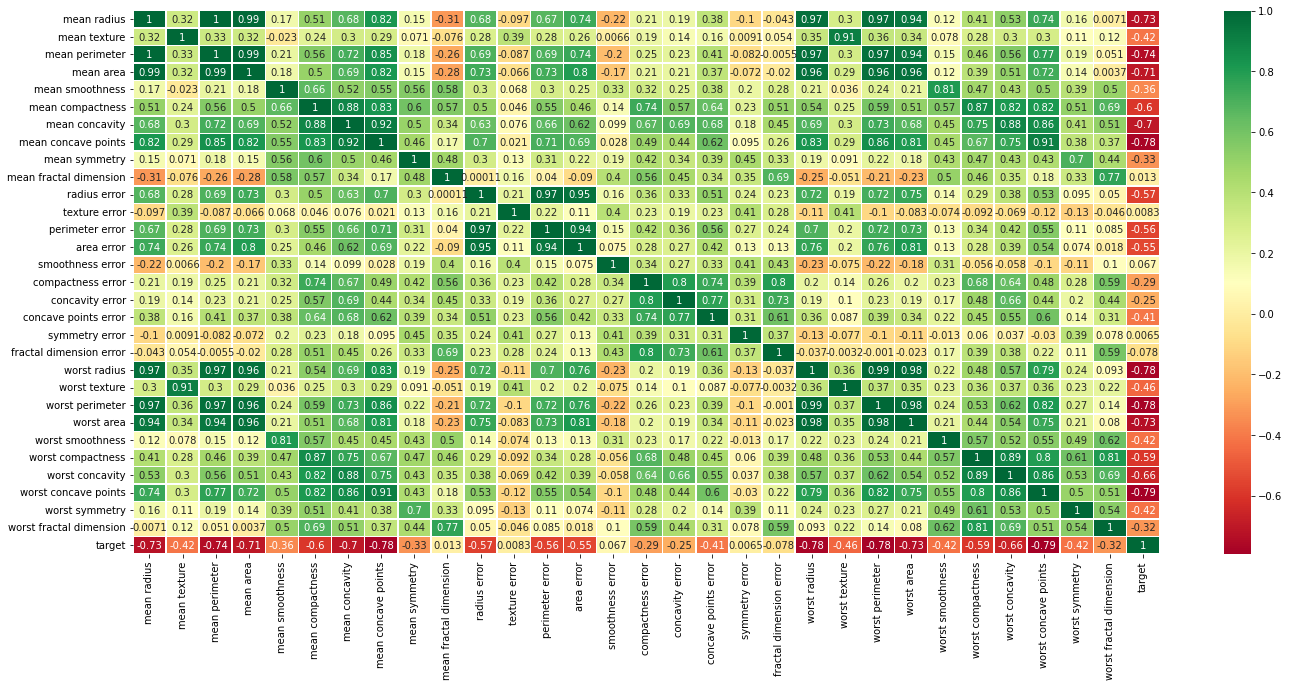

In [ ]:
#Vamos começar verificando se existem correlações entre as variáveis
plt.figure(figsize=(23, 10))
color_palette = 'RdYlGn'
hm = sns.heatmap(data_df.corr(),annot=True, linewidth=.5, cmap=color_palette)


Podemos verificar que variáveis que representam diferentes métricas de uma mesma característica (por exemplo "worst radius" e "mean radius", "worst texture" e "mean texture" possuem **forte correlação positiva**. Características como "mean radius", "mean perimeter", "mean area", "mean concavity", "mean concave points", "worst radius", "worst perimeter","worst area" e "worst concave points" tem **forte correlação negativa com a variável "target"** . Isso pode indicar que quando o câncer é maligno (target = 0) os valores dessas variáveis são mais altos.





Text(0.5, 1.0, 'Mean Concave Points')

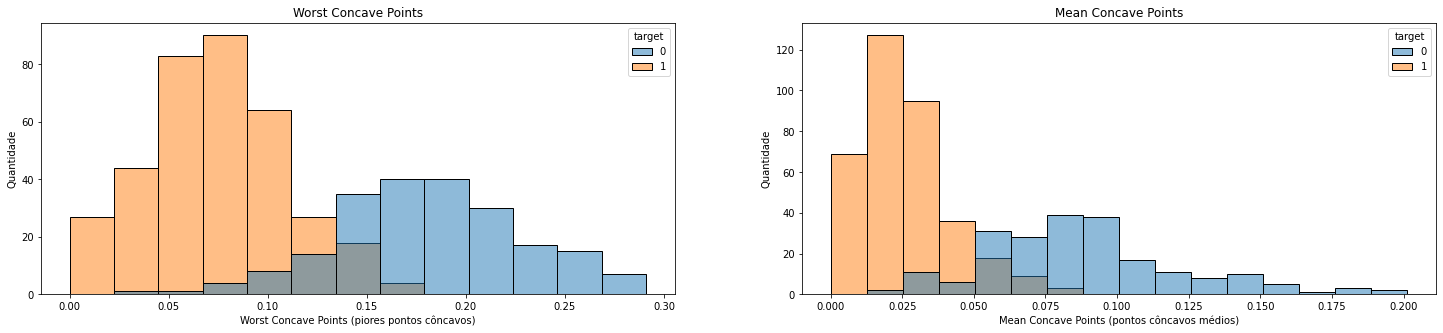

In [ ]:
#Vamos verificar a distribuição de duas das variáveis que estão mais fortamente correlacionadas negativamente com a variável alvo e também analisar como a variável alvo está contida nessa distribuição

#WORST CONCAVE POINTS 
plt.subplots(figsize=(25, 5)) 
plt.subplot(1, 2, 1) 
wcp = sns.histplot(data = data_df, x='worst concave points', hue='target')
wcp.set(xlabel='Worst Concave Points (piores pontos côncavos)', ylabel='Quantidade')
plt.title('Worst Concave Points')

#MEAN CONCAVE POINTS 
plt.subplot(1, 2, 2) 
wcp = sns.histplot(data = data_df, x='mean concave points', hue='target')
wcp.set(xlabel='Mean Concave Points (pontos côncavos médios)', ylabel='Quantidade')
plt.title('Mean Concave Points')


Ambas as variáveis possuem certo desvio para a direita na distribuição, e seus valores mais comuns se localizam mais a esquerda do gráfico. É possível verificar que de fato os valores maiores dessas variáveis estão correlacionados com o fato do câncer ser maligno (target = 0).



## Pré-processamento


### Redução da dimensionalidade do dataset
Temos cerca de 30 variáveis disponíveis, mas algumas delas são fortemente correlacionadas positivamente entre si (coeficiente de correlação >= 0.8), visto que são diferentes valores que representam a mesma característica (ex: worst area e mean area). Vamos eliminar as variáveis que contém o valor médio de cada característica (ex: mean area), mantendo as variáveis contendo os valores máximos, visto que essas variáveis estão mais correlacionadas com a variável alvo e podem ser melhores preditoras.

In [ ]:
data_df = data_df.drop(['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'], axis=1)

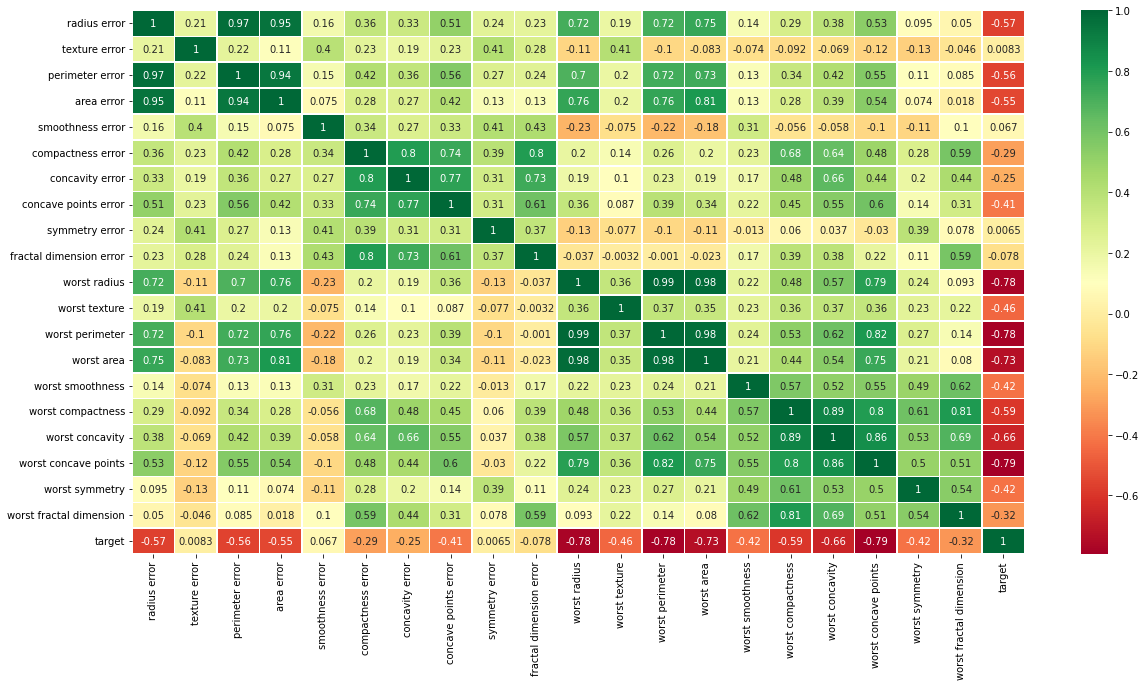

In [ ]:
plt.figure(figsize=(20, 10))
color_palette = 'RdYlGn'
hm_pp = sns.heatmap(data_df.corr(),annot=True, linewidth=.5, cmap=color_palette)

As variáveis contendo informações referentes ao raio (radius) se correlacionam fortemente com as variáveis de área e perímetro. Como a área de um círculo é calculada como 1/2*raio*perímetro, a área já contém informação dessas duas variáveis. Por isso vamos manter as informações relacionadas a área e deletar as colunas relacionadas a raio e perímetro.

In [ ]:
data_df = data_df.drop(['worst radius', 'worst perimeter', 'radius error', 'perimeter error'], axis=1)

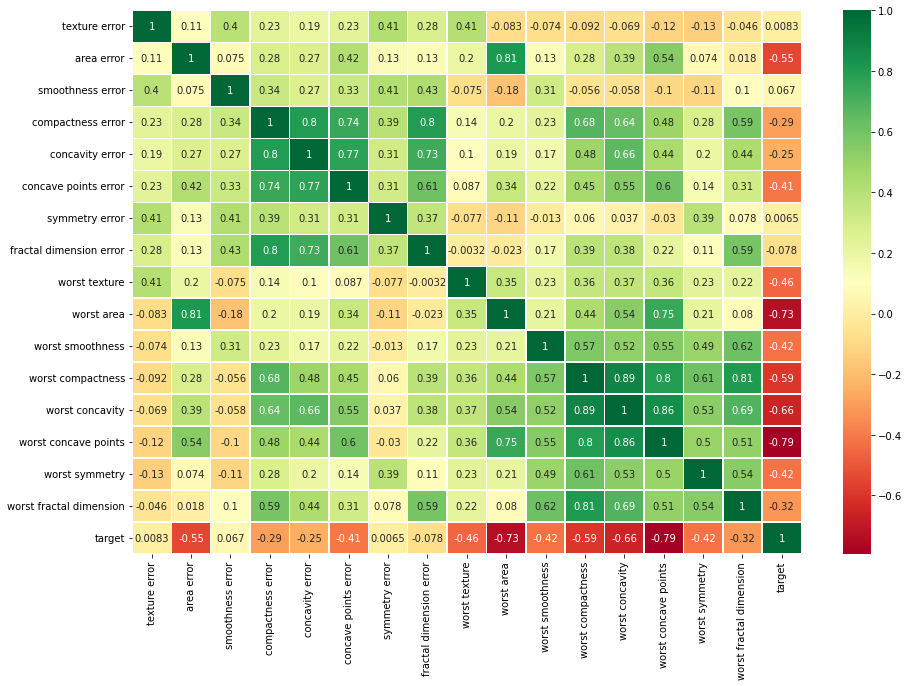

In [ ]:
plt.figure(figsize=(15, 10))
color_palette = 'RdYlGn'
hm_pp = sns.heatmap(data_df.corr(),annot=True, linewidth=.5, cmap=color_palette)

As variáveis contendo dados de compactação e concavidade também parecem ter alta correlação entre si. Como temos a variável de pontos côncavos que se correlaciona fortemente com ambas, vamos elimina-las

In [ ]:
data_df = data_df.drop(['worst concavity', 'concavity error'], axis=1)

In [ ]:
data_df = data_df.drop(['worst compactness', 'compactness error'], axis=1)

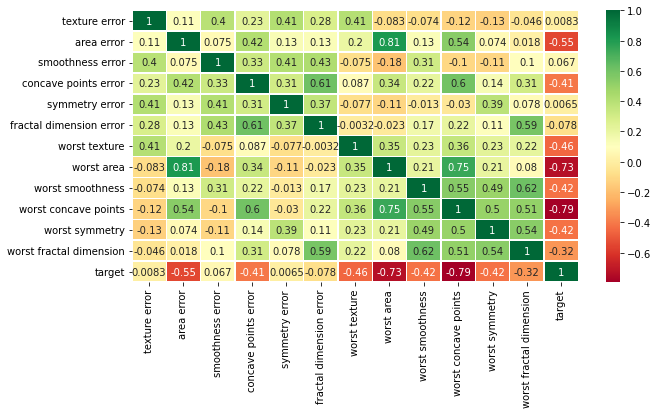

In [ ]:
plt.figure(figsize=(10, 5))
color_palette = 'RdYlGn'
hm_pp = sns.heatmap(data_df.corr(),annot=True, linewidth=.5, cmap=color_palette)

Por fim, o erro da área e a pior área também possuem um coeficiente de correlação > 0.8. Vamos eliminar a variável 'area error' pois ela se correlaciona menos fortemente com a variável alvo

In [ ]:
data_df = data_df.drop(['area error'], axis=1)

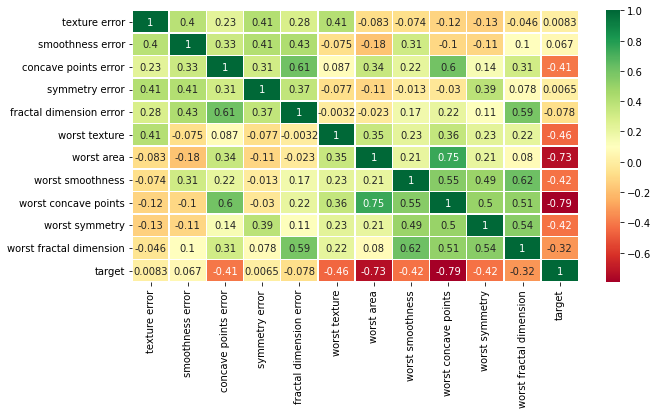

In [ ]:
plt.figure(figsize=(10, 5))
color_palette = 'RdYlGn'
hm_pp = sns.heatmap(data_df.corr(),annot=True, linewidth=.5, cmap=color_palette)

In [ ]:
data_df.shape

(569, 12)

### Normalização

Agora temos um dataset reduzido, contendo 12 variáveis. Vamos analisar a distribuição dos valores nessas variáveis restantes

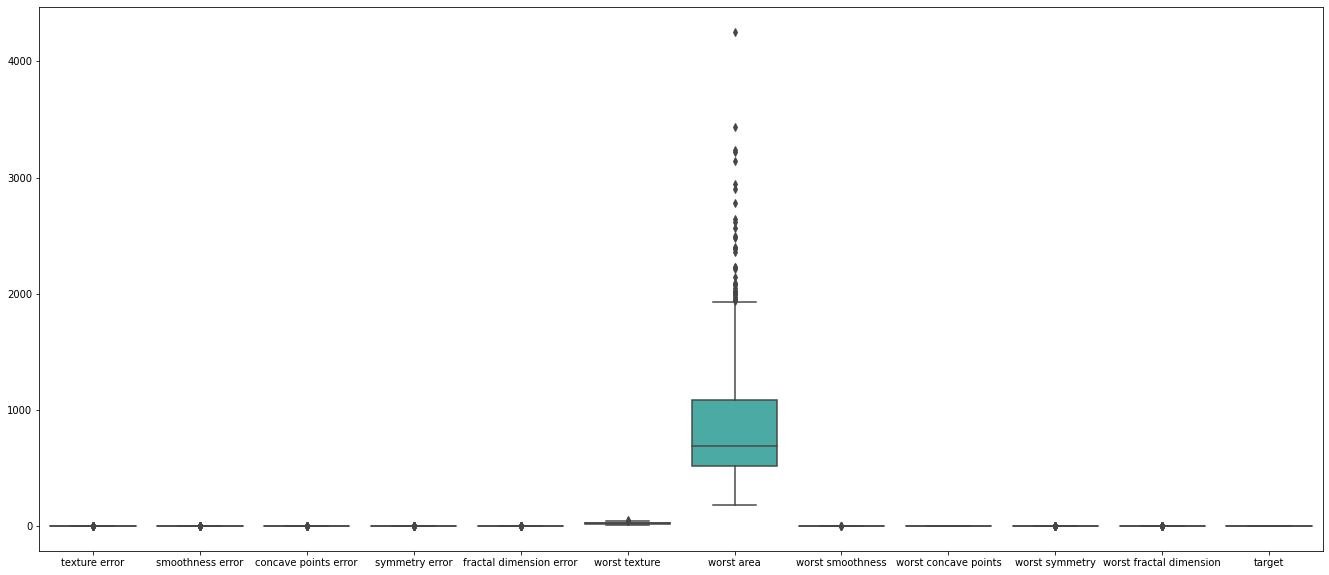

In [ ]:
plt.figure(figsize=(23, 10))
sns.boxplot(data=data_df)

In [ ]:
data_df.describe()

,texture error,smoothness error,concave points error,symmetry error,fractal dimension error,worst texture,worst area,worst smoothness,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,1.216853,0.007041,0.011796,0.020542,0.003795,25.677223,880.583128,0.132369,0.114606,0.290076,0.083946,0.627417
std,0.551648,0.003003,0.006170,0.008266,0.002646,6.146258,569.356993,0.022832,0.065732,0.061867,0.018061,0.483918
min,0.360200,0.001713,0.000000,0.007882,0.000895,12.020000,185.200000,0.071170,0.000000,0.156500,0.055040,0.000000
25%,0.833900,0.005169,0.007638,0.015160,0.002248,21.080000,515.300000,0.116600,0.064930,0.250400,0.071460,0.000000
50%,1.108000,0.006380,0.010930,0.018730,0.003187,25.410000,686.500000,0.131300,0.099930,0.282200,0.080040,1.000000
75%,1.474000,0.008146,0.014710,0.023480,0.004558,29.720000,1084.000000,0.146000,0.161400,0.317900,0.092080,1.000000
max,4.885000,0.031130,0.052790,0.078950,0.029840,49.540000,4254.000000,0.222600,0.291000,0.663800,0.207500,1.000000


É perceptivel que a variável 'worst area' tem uma grande amplitude quando comparada as demais, visto que mais da metade das nossas variáveis possuem valores menores do que 1. Vamos então fazer uma normalização das nossas variáveis para que fiquem dentro de uma mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separando a coluna alvo para que ela não seja afetada
target = data_df['target']
data_df = data_df.drop(columns=['target'])

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data, except the target column
df_scaled = scaler.fit_transform(data_df)

# Put the target column back into the DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=data_df.columns)
df_scaled['target'] = target

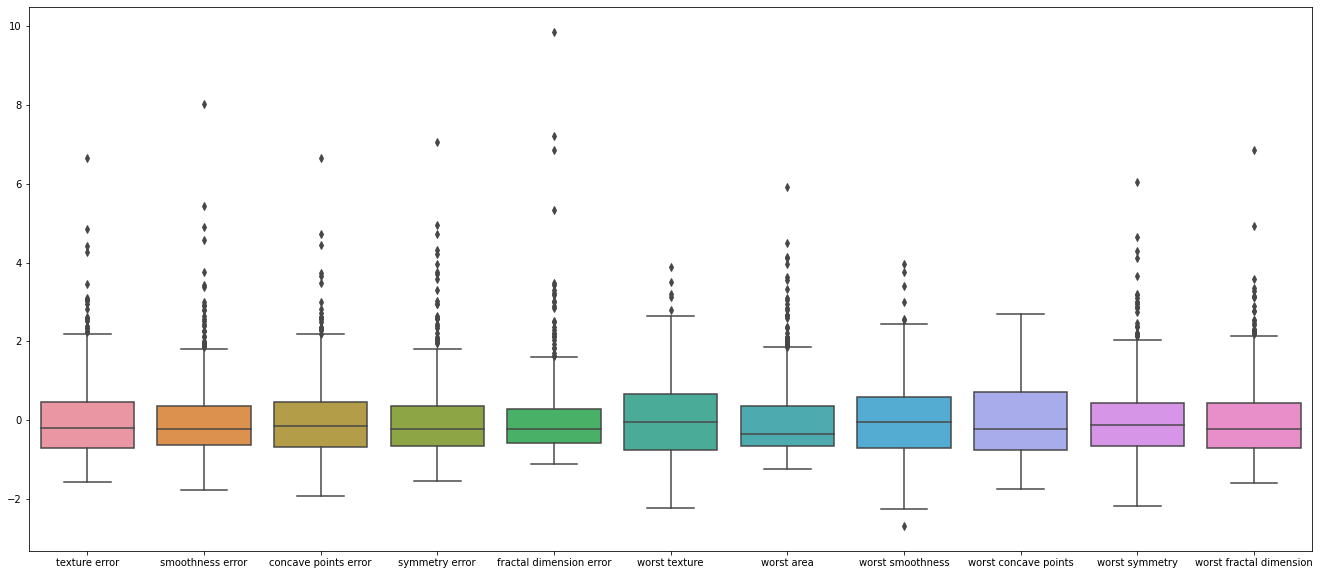

In [ ]:
plt.figure(figsize=(23, 10))
sns.boxplot(data=df_scaled.drop('target',axis=1))

Agora todas as variáveis possuem uma distribuição mais uniforme, o que pode ser positivo para a performance preditiva

## Dividindo dataset em treino, teste e validação

In [ ]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5, random_state = 42, stratify=y_val_test)


In [ ]:
#Vamos verificar a quantidade de cada target em cada dataset
y_train_proportion = pd.Series(y_train).value_counts()
print(y_train_proportion)

y_val_proportion = pd.Series(y_val).value_counts()
print(y_val_proportion)

y_test_proportion = pd.Series(y_test).value_counts()
print(y_test_proportion)

1    250
0    148
Name: target, dtype: int64
1    53
0    32
Name: target, dtype: int64
1    54
0    32
Name: target, dtype: int64


In [ ]:
#Vamos verificar se a proporção das variáveis permaneceu a mesma em todos os datasets
y_train_proportion = pd.Series(y_train).value_counts(normalize=True)
print(y_train_proportion)

y_val_proportion = pd.Series(y_val).value_counts(normalize=True)
print(y_val_proportion)

y_test_proportion = pd.Series(y_test).value_counts(normalize=True)
print(y_test_proportion)

df_scaled_proportion = pd.Series(df_scaled['target']).value_counts(normalize=True)
print(df_scaled_proportion)

1    0.628141
0    0.371859
Name: target, dtype: float64
1    0.623529
0    0.376471
Name: target, dtype: float64
1    0.627907
0    0.372093
Name: target, dtype: float64
1    0.627417
0    0.372583
Name: target, dtype: float64


É possível observar que as variáveis seguem a mesma proporção do dataset original em todos os datasets novos. Com isso, podemos seguir com o treino.

## Escolhendo o tipo de modelo
Vamos testar diferentes tipos de modelo de inteligência artificial para verificar quais conseguem atingir melhores métricas para o nosso dataset. 

Quais seriam as melhores métricas nesse contexto?
Nós temos um dataset relativamente pequeno e desbalanceado. A variável 1 indica que o tumor é benigno, logo as métricas são calculadas levando em conta essa variável. Assim temos:


*   **True Positive (TP):** Modelo disse que o tumor é benigno e ele de fato é benigno
*   **False Positive (FP):** Modelo disse que o tumor é benigno mas na verdade ele é maligno
*   **True Negative (TN):** Modelo disse que o tumor não é benigno e ele de fato não é benigno
*   **False Negative (FN):** Modelo disse que o tumor não é benigno mas ele é benigno

Em um contexto clínico, é muito grave que o modelo classifique um tumor maligno como benigno. Assim, nesse caso queremos reduzir os falsos positivos. É importante que o número de verdadeiros negativos seja alto, pois isso significa que o modelo está classificando corretamente os tumores malignos como não-benignos. Ademais, um grande número de falso negativos causaria um estresse descenessário no paciente e na equipe médica, então nesse contexto o objetivo é:
*  Reduzir o máximo possível de falsos positivos
*  Ter o máximo de verdadeiros negativos possível
*  Manter os falsos negativos sobre contole

Nesse caso, podemos levar em conta algumas métricas principais:
* **Especificidade: *TN / (TN+FP)*** -> Quanto maior a especificidade, maior o número de verdadeiros negativos e menor o número de falso positivos, exatamente o que queremos atingir

* **Recall: *TP / (TP+FN)*** -> Quanto maior o recall, maior  o número de verdadeiros positivos e menor o número de falsos negativos, o que também queremos atingir

* **AUC *(Area Under the Curve)*** -> Quanto maior, melhor, visto que é a medida da proporção de vezes que a predição acertará o desfecho quando o indivíduo de fato tem o desfecho.

Portanto, um modelo excelente terá uma alta especificidade, um alto recall e um alto AUC.

In [ ]:
#Primeiramente, vamos testar diferentes tipos de algoritmo para verificar quais deles apresentam o melhor desempenho para os dados que temos, levando em conta as métricas acima.